**PART ONE PROJECT BASED**

• DOMAIN: Electronics and Telecommunication

• CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a
machine learning model which can help the company to predict the equipment’s signal quality using various parameters.

In [ ]:
# Importing data from Google drive

from google.colab import drive
drive.mount('/content/drive')


In [25]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing all the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pickle

from scipy.stats import zscore, norm



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

from keras.layers import BatchNormalization, Dropout
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import optimizers

from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Flatten

In [4]:
# loading the data to a dataframe

df = pd.read_csv("/content/drive/MyDrive/Introduction to NN/Assignment/Part- 1 - Signal.csv")

In [5]:
# displaying the top 5 records of the dataframe

df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Checking the shape of the data frame

print("The shape of the dataframe is",df.shape)

The shape of the dataframe is (1599, 12)


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000




*   Parameter 1 ▶ The mean is 8.3 and greater than the 50 percent value of 7.9, the min is 4.6 and the max is 15.9 which is greater than the 75 percent value of 9.2. The data is skewed to the right and has outliers


*  Parameter 2 ▶ The mean is 0.5 which is equal to the 50 percent value of 0.52, the min is 0.12 and the max is 1.58 which is greater than the 75 percent value of 0.64. 
The data follows a normal distribution and might have outliers

* Parameter 3 ▶ The mean is 0.27 which is equal to the 50 percent value of 0.26, the min is 0.00 and the max is 1.00 which is greater than the 75 percent value of 0.42. 
The data follows a normal distribution and might have outliers

* Parameter 4 ▶ The mean is 2.53 which is almost equal to the 50 percent value of 2.200, the min is 0.90 and the max is 15.50 which is greater than the 75 percent value of 2.600. 
The data follows a normal distribution and has a lot of outliers on the right side

* Parameter 5 ▶ The mean is 0.08 which is almost equal to the 50 percent value of 0.079, the min is 0.012 and the max is 0.611 which is greater than the 75 percent value of 0.900. 
The data follows a normal distribution and has a lot of outliers on the right side

* Parameter 6 ▶ The mean is 15.87 which is almost equal to the 50 percent value of 14.00, the min is 1.00 and the max is 72.00 which is greater than the 75 percent value of 21.00. 
The data follows a normal distribution and has a lot of outliers on the right side

* Parameter 7 ▶ The mean is 46.46 which greater than the 50 percent value of 38.00, the min is 6.00 and the max is 289.00 which is greater than the 75 percent value of 62.00. 
The data is skewed to the right and has a lot of outliers on the right side

* Parameter 8 ▶ The mean is 0.99 which equal to the 50 percent value of 0.99, the min is 0.99 and the max is 1.003 which is greater than the 75 percent value of 0.99. 
The data is normally distributed with no outliers

* Parameter 9 ▶ The mean is 3.31 which is equal to the 50 percent value of 3.31, the min is 2.74 and the max is 4.01 which is greater than the 75 percent value of 3.400. 
The data is normally distributed with no outliers

* Parameter 10 ▶ The mean is 0.658 which is equal to the 50 percent value of 0.62, the min is 0.33 and the max is 2.00 which is greater than the 75 percent value of 0.73. 
The data is skewed to the right and has a lot of outliers on the right side

* Parameter 11 ▶ The mean is 10.422 which is equal to the 50 percent value of 10.20, the min is 8.400 and the max is 14.900 which is greater than the 75 percent value of 11.100. 
The data is normally distributed and has no outliers

* Signal_Strength ▶ The mean is 5.63 which is almost equal to the 50 percent value of 6.00, the min is 3.00 and the max is 8.00 which is greater than the 75 percent value of 6.00.
The data is normally distributed with no outliers







In [8]:
df['Signal_Strength'].unique()

array([5, 6, 7, 4, 8, 3])

In [9]:
# checking the null of each columns

df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [10]:
# checking the data type of each column

df.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

**UNIVARIATE ANALYSIS**

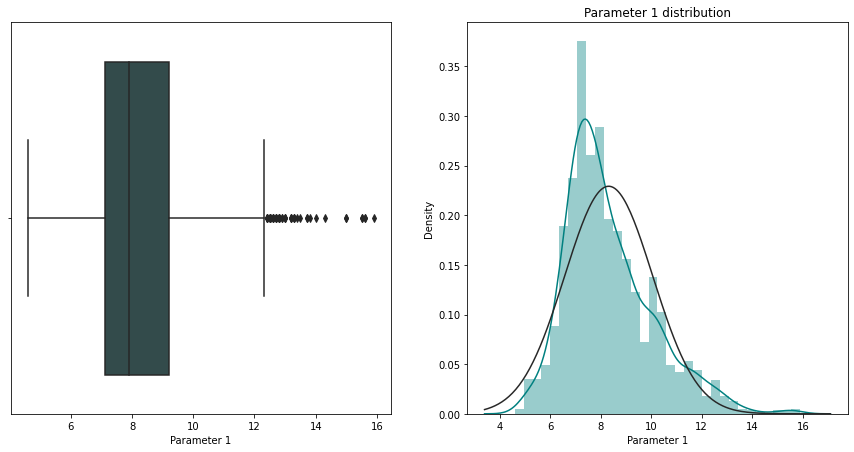

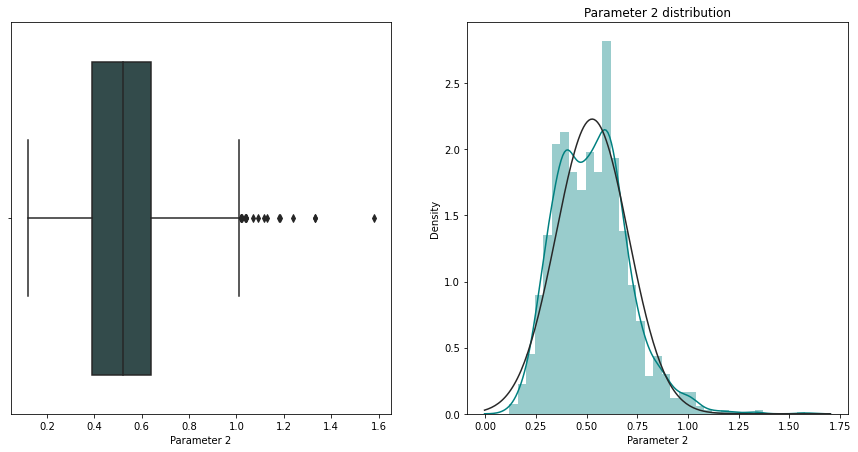

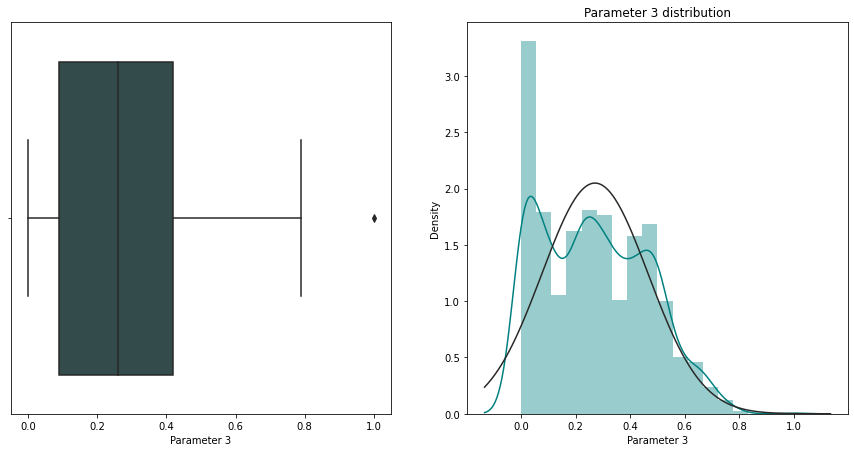

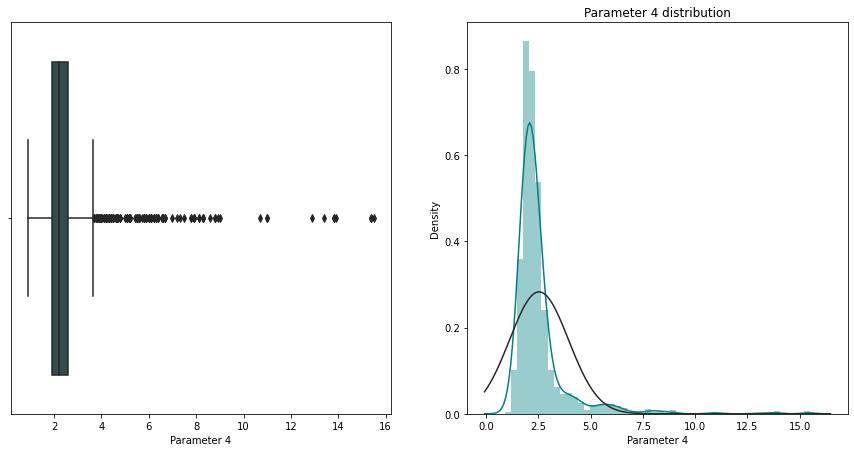

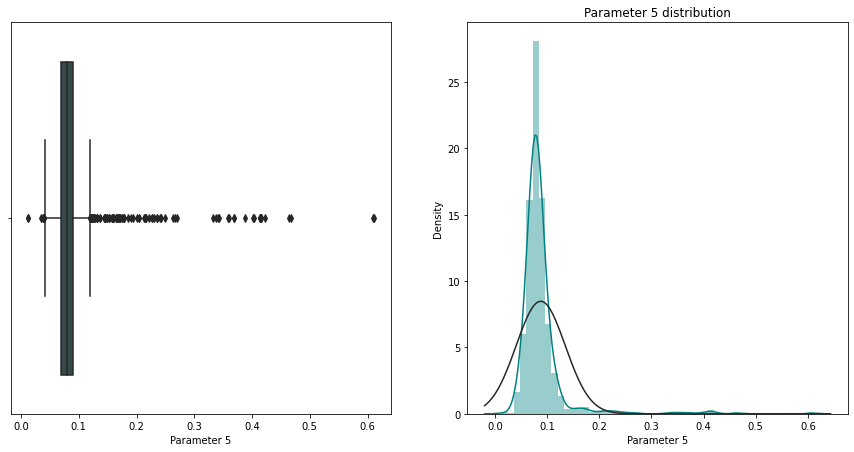

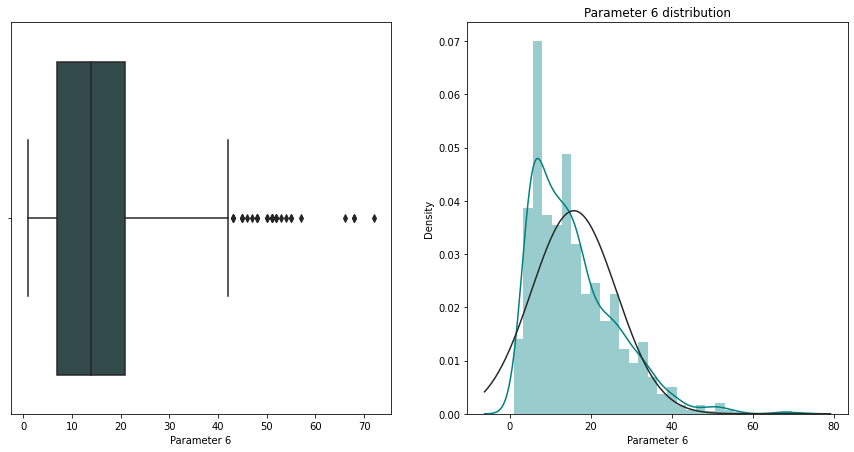

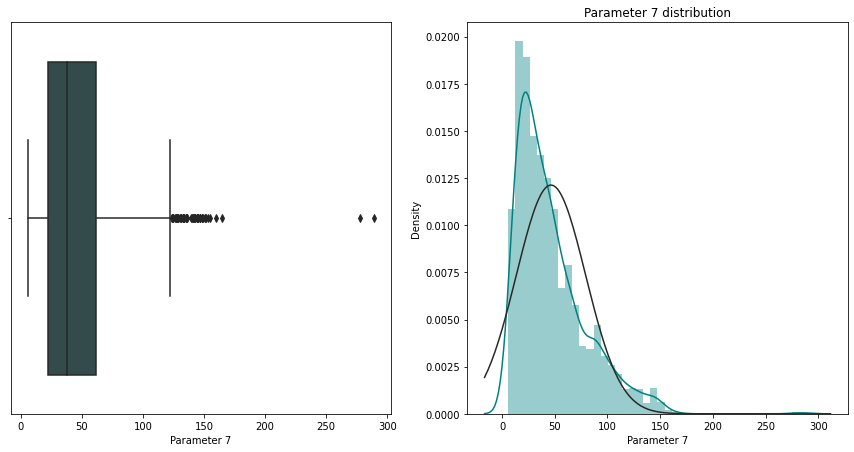

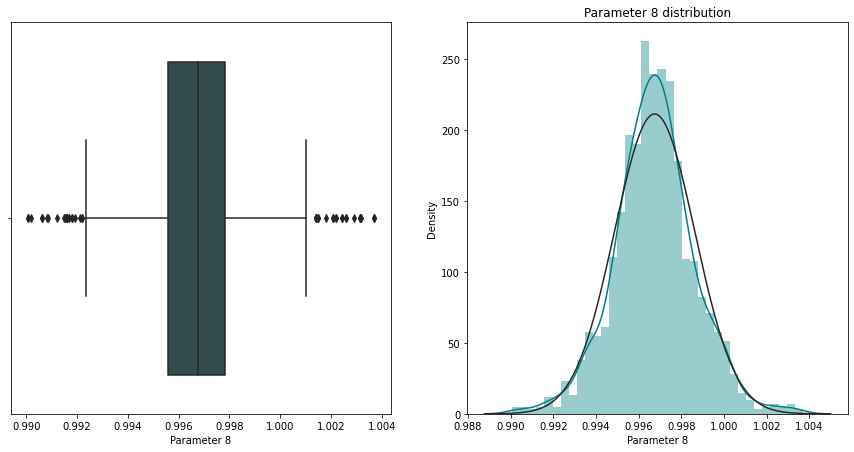

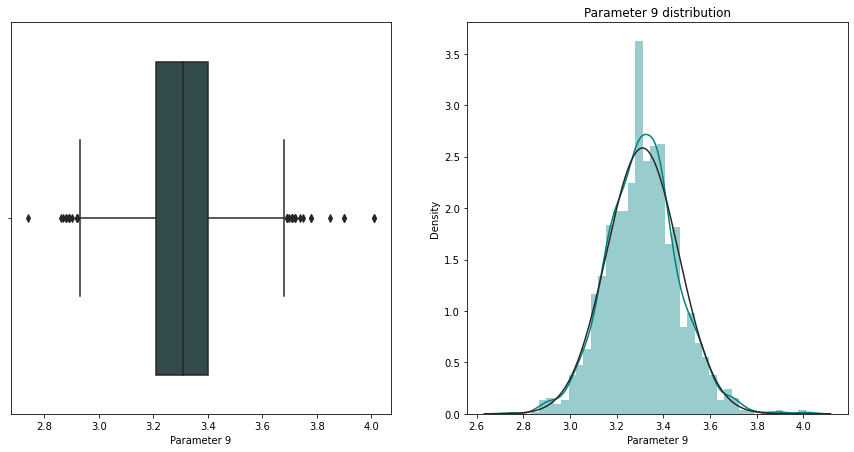

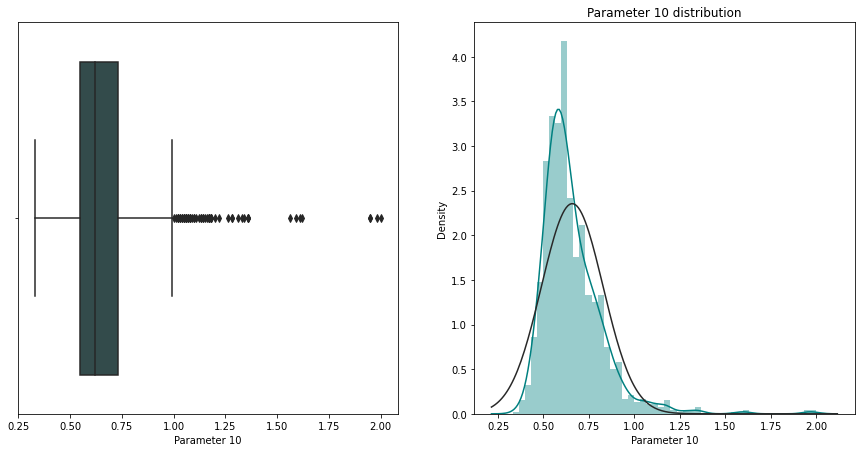

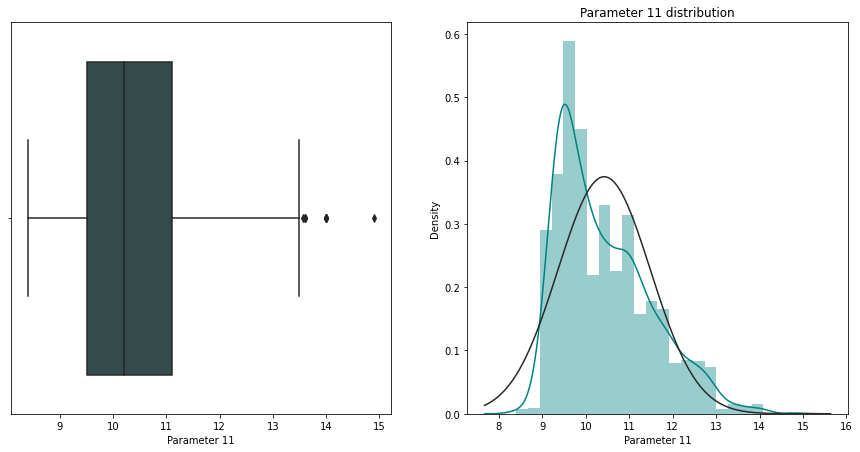

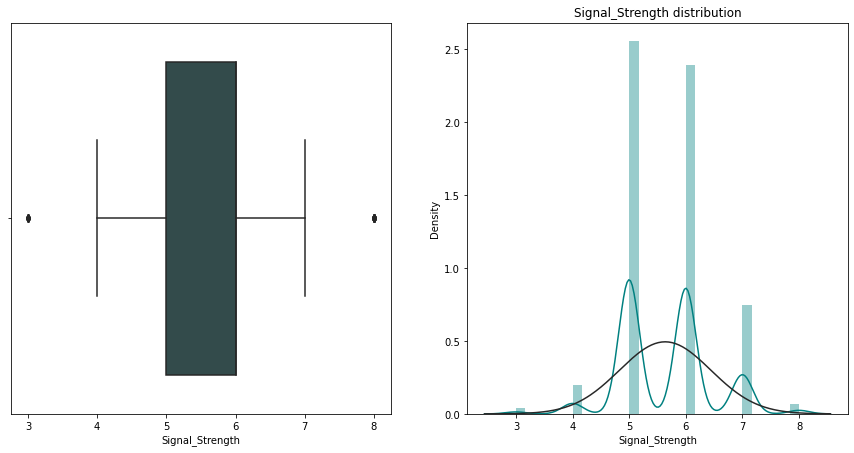

In [11]:
# Checking the distribution and the outliers of each colum

for cols in df.columns.values:
    f,(ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))
    sns.boxplot(x = cols, data = df, ax = ax1, orient = 'v', color = 'darkslategrey')
    sns.distplot(df[cols], ax = ax2, color = 'teal', fit = norm).set_title(f'{cols} distribution')

* Parameter 1 ▶ The data is skewed to the right and has outliers on the right side

* Parameter 2 ▶ The data almost follows a normal distribution and has outliers on the right side

* Parameter 3 ▶ The data has 3 peaks and skewed to the right with one outlier on the right side

* Parameter 4 ▶ The data is extremely skewed to the right and has many outliers on the right side

* Parameter 5 ▶ The data is extremely skewed to the right and has outliers on both sides

* Parameter 6 ▶ The data is skewed to the right and has outliers on the right side

* Parameter 7 ▶ The data is skewed to the right side and has outliers on the right side

* Parameter 8 ▶ The data almost follows a normal distribution and has outliers on both the sides

* Parameter 9 ▶ The data almost follows a normal distribution and has outliers on both the sides

* Parameter 10 ▶ The data is skewed to the right and has outliers on the right side

* Parameter 11 ▶ The data is skewed to the right and has outliers on the right side



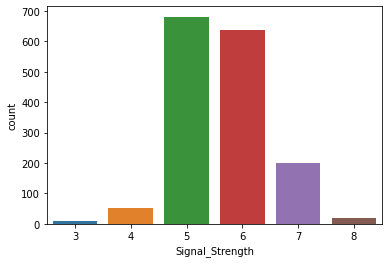

In [12]:
sns.countplot(x = 'Signal_Strength',data = df);

* The count of signal strenght of 5 and 6 are greater than all the other counts of signal strengths

**BI-VARIATE ANALYSIS**

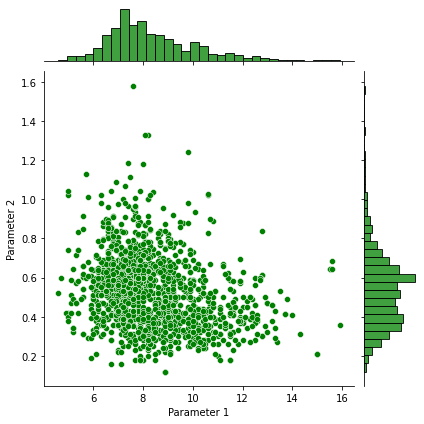

In [13]:
sns.jointplot(x = df['Parameter 1'],y = df['Parameter 2'],data = df,color = 'Green');

* Parameter 1 and Parameter 2 has a slight positive correlation

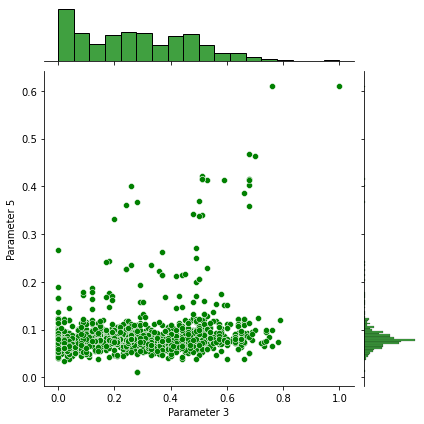

In [14]:
sns.jointplot(x = df['Parameter 3'],y = df['Parameter 5'],data = df,color = 'Green');

* Parameter 3 and parameter 5 have no correlation

**MULTI-VARIATE ANALYSIS**

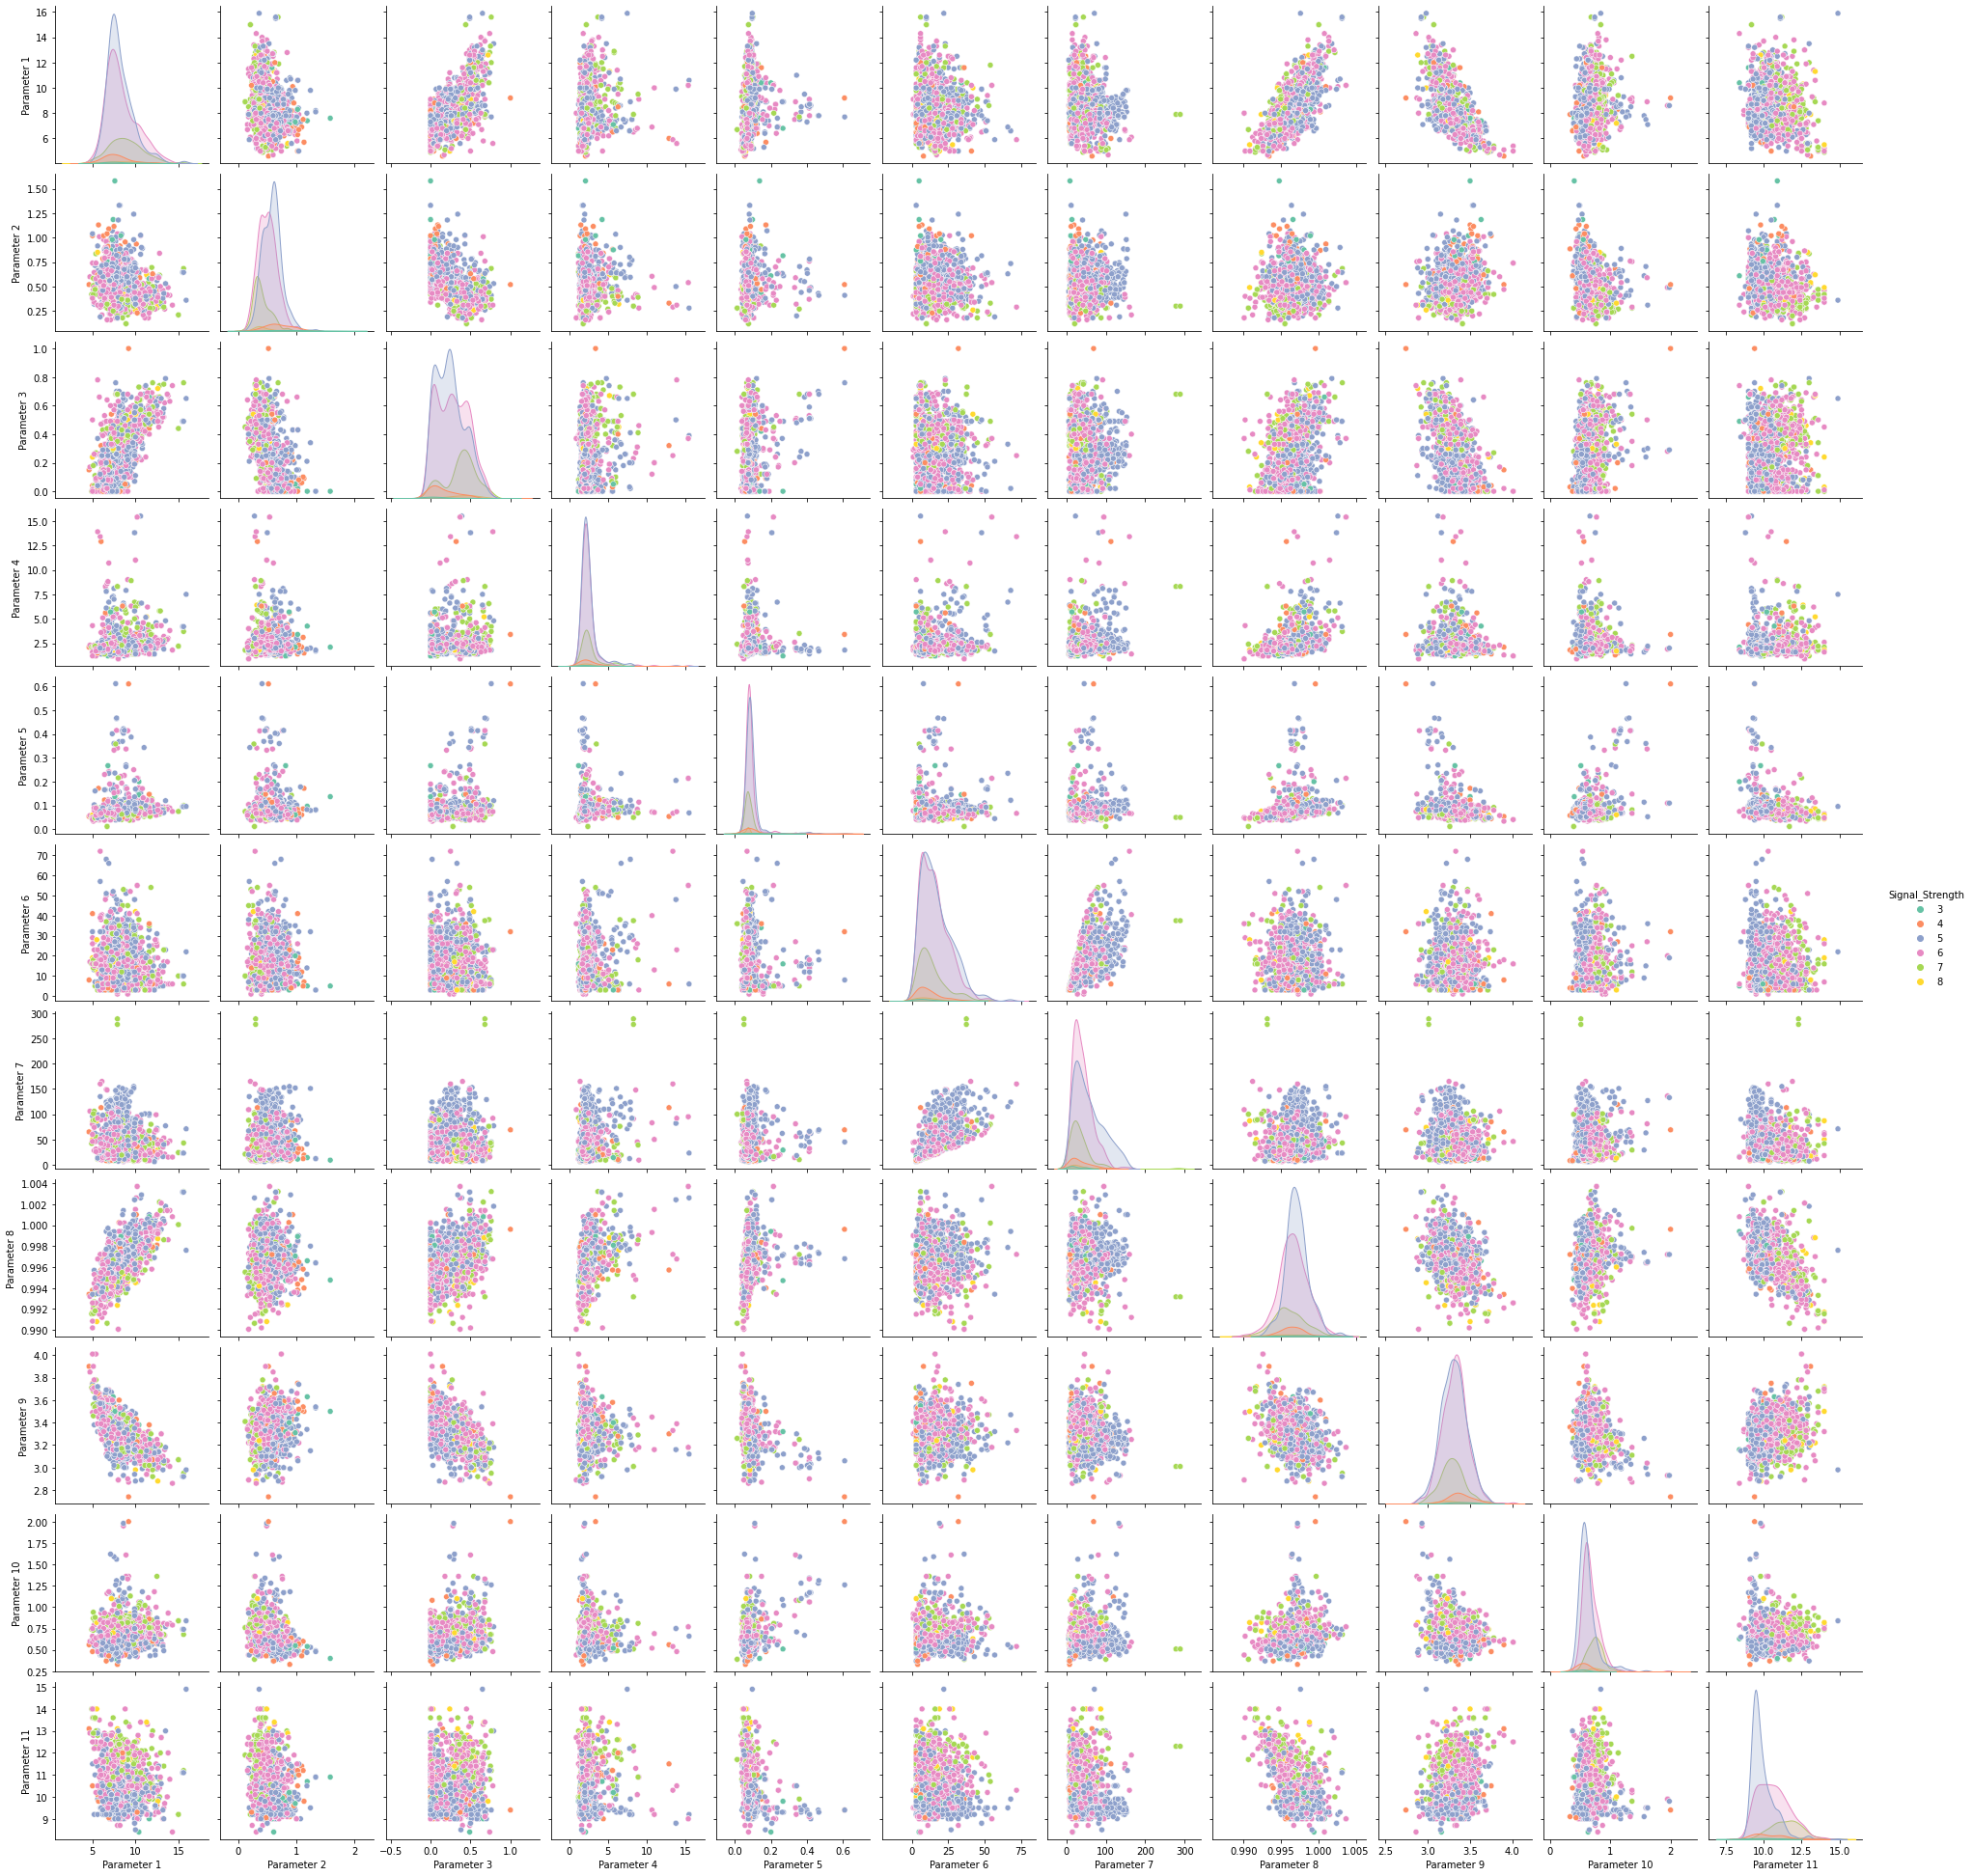

In [15]:
sns.pairplot(df,hue = 'Signal_Strength',
             palette="Set2")

Text(0.5, 1.0, 'Correlation Matrix of Data')

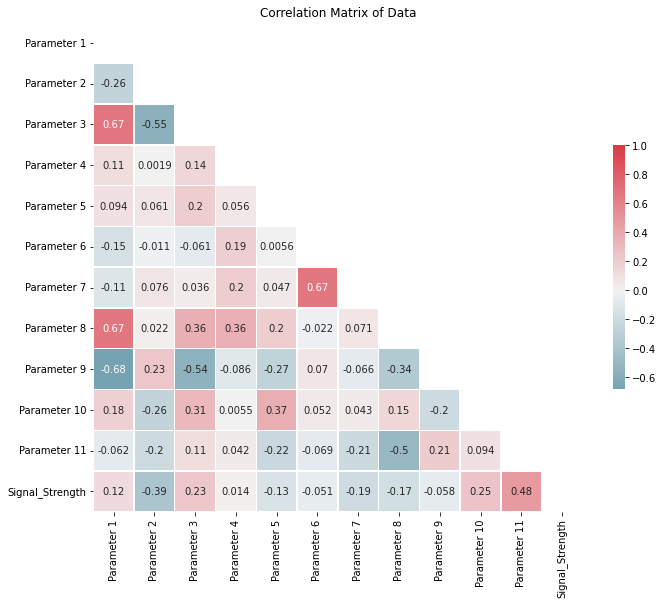

In [16]:
corr = df.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix of Data')


* Parameter 1 ▶ It has high positive correlation Parameter 3 and Parameter 8. It has low correlation with Parameter 11

* Parameter 2 ▶ It has high negative correlation with parameter 3 and Parameter 10. It has low correlation with Parameter 8, Parameter 6 and Parameter 4

* Parameter 3 ▶ It has mild positive correlation with Paramater 8 and Parameter 10. It has strong negative correlation with Parameter 9

* Parameter 4 ▶ It has mild positive correlation with parameter 8 and has no correlation with all the other variables

* Parameter 5 ▶ It has mild postiive correlation with parameter 10 and has mild negative correlation with parameter 11 and parameter 9

* Parameter 6 ▶ It has strong positive correlation with parameter 7 and has no correlation with all the other variables

* Parameter 7 ▶ It has mild negative correlation wiht parameter with Parameter 11

* Parameter 8 ▶ It has negative correlation with Parameter 9

* Parameter 9 ▶ It has strong negative correlation with Parameter 9

* Parameter 10 ▶ It has positive correlation with parameter 3 and parameter 5

* Parameter 11 ▶ It has no correlation with any other variables

In [17]:
# comparing the correlation of the features with the target variable

absCorrwithDep = []
allVars = df.drop('Signal_Strength', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(df['Signal_Strength'].corr(df[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
10,Parameter 11,0.476166
1,Parameter 2,0.390558
9,Parameter 10,0.251397
2,Parameter 3,0.226373
6,Parameter 7,0.1851
7,Parameter 8,0.174919
4,Parameter 5,0.128907
0,Parameter 1,0.124052
8,Parameter 9,0.0577314
5,Parameter 6,0.0506561


* The Target Variable has high positive correlation with Parameter 11, Parameter 12, Parameter 10 and Parameter 3

In [18]:
# Segregating into target and features

X = df.drop(['Signal_Strength'],axis = 1)
y = df['Signal_Strength']

In [19]:
# scaling the independent variables and storing them in the dataframe

sc=StandardScaler()
X_scaled = pd.DataFrame(data = sc.fit_transform(X),columns=X.columns)

In [20]:
X_scaled.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [21]:
# splitting into train and test data

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.2, random_state = 0)

**Model Creation**

* We create a simple model and fit it with the data to see the performance of the model

In [ ]:
import random
random.seed(0)

In [26]:
# Initialize the model
reg1 = Sequential()

# add a hidden layer with relu activation function
reg1.add(Dense(activation = 'relu', input_dim = 11, units=6, kernel_initializer='he_normal'))

# add output layer with no activation function
reg1.add(Dense(units = 1))

# use the adam optimizer
adam = keras.optimizers.Adam(lr = 0.001)
reg1.compile(optimizer='Adam', loss='mse', metrics=['mae'])

In [27]:
reg1.fit(X_train, y_train,           
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=8)

Epoch 1/100
160/160 [==============================] - 1s 3ms/step - loss: 26.8099 - mae: 4.9823 - val_loss: 20.7876 - val_mae: 4.2873
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 17.9741 - mae: 3.9021 - val_loss: 14.2606 - val_mae: 3.4277
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 12.6475 - mae: 3.1790 - val_loss: 10.0044 - val_mae: 2.7767
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 8.7395 - mae: 2.5712 - val_loss: 6.8913 - val_mae: 2.2497
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 5.9424 - mae: 2.0675 - val_loss: 4.7983 - val_mae: 1.8334
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 4.1770 - mae: 1.7141 - val_loss: 3.5838 - val_mae: 1.5454
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 3.1801 - mae: 1.4772 - val_loss: 2.8220 - val_mae: 1.3397
Epoch 8/100
160/160 [==============================] - 0s 2ms/s

In [28]:
reg1.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.4028 - mae: 0.4726


[0.4028150141239166, 0.47258296608924866]

* **The model performs good ont the training and the test set**

* **The model is a very simple model and has a loss of about 0.38 and has a test loss of 0.40**

* **We will try models with many layers**

**We are going to try a model with 3 hidden layers and with more number of neurons at each layer. The activation function that we are using is the LeakyRelu. We are using this LeakyRelu since after standardizing the data the range would have been between -1 to +1**

In [29]:
# Initialize the Sequential model

reg2 = Sequential()


reg2.add(Dense(activation = 'LeakyReLU', input_dim = 11, units=6, kernel_initializer='he_normal'))


reg2.add(Dense(activation = 'LeakyReLU', units=100, kernel_initializer='he_normal'))


reg2.add(Dense(activation = 'LeakyReLU', units=50, kernel_initializer='he_normal'))


reg2.add(Dense(activation = 'LeakyReLU',units=5, kernel_initializer='he_normal'))


reg2.add(Dense(units = 1))

adam = keras.optimizers.Adam(lr = 0.001)
reg2.compile(optimizer='Adam', loss='mse', metrics=['mae'])

In [30]:
# fit the model on train data and validate it with the test data

reg2.fit(X_train, y_train,           
          validation_data=(X_test,y_test),
          epochs=300,
          batch_size=8)

Epoch 1/300
160/160 [==============================] - 1s 3ms/step - loss: 10.4181 - mae: 2.5957 - val_loss: 3.1887 - val_mae: 1.4481
Epoch 2/300
160/160 [==============================] - 0s 2ms/step - loss: 2.7696 - mae: 1.3232 - val_loss: 1.5735 - val_mae: 1.0041
Epoch 3/300
160/160 [==============================] - 0s 2ms/step - loss: 1.4969 - mae: 0.9599 - val_loss: 0.9099 - val_mae: 0.7502
Epoch 4/300
160/160 [==============================] - 0s 2ms/step - loss: 0.9199 - mae: 0.7516 - val_loss: 0.6628 - val_mae: 0.6238
Epoch 5/300
160/160 [==============================] - 0s 3ms/step - loss: 0.7188 - mae: 0.6618 - val_loss: 0.6368 - val_mae: 0.6175
Epoch 6/300
160/160 [==============================] - 0s 2ms/step - loss: 0.6151 - mae: 0.6100 - val_loss: 0.6413 - val_mae: 0.6170
Epoch 7/300
160/160 [==============================] - 0s 2ms/step - loss: 0.5441 - mae: 0.5773 - val_loss: 0.5038 - val_mae: 0.5610
Epoch 8/300
160/160 [==============================] - 0s 2ms/step -

In [31]:
reg2.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.4568 - mae: 0.5091


[0.4567757546901703, 0.5090733170509338]

* **This model with more neurons and 3 hidden layers is performing better on the training set where the loss is at about 0.20 but the loss of the test set hasn't improved when compared to the first model with just one hidden layer. The test loss is at about 0.42**

* **We will use the same model with same hyperparameters and try to regularize it so that the train and the test loss is very similar.**


In [32]:
# Initialize the Sequential model

reg3 = Sequential()


reg3.add(Dense(activation = 'LeakyReLU', input_dim = 11, units=6, kernel_initializer='he_normal'))


reg3.add(Dense(activation = 'LeakyReLU', units=100, kernel_initializer='he_normal'))
reg3.add(Dropout(0.2))


reg3.add(Dense(activation = 'LeakyReLU', units=50, kernel_initializer='he_normal'))
reg3.add(Dropout(0.2))

reg3.add(Dense(activation = 'LeakyReLU',units=5, kernel_initializer='he_normal'))
reg3.add(Dropout(0.2))


reg3.add(Dense(units = 1))

adam = keras.optimizers.Adam(lr = 0.001)
reg3.compile(optimizer='Adam', loss='mse', metrics=['mae'])

In [33]:
# fit the model on train data and validate it with the test data

reg3.fit(X_train, y_train,           
          validation_data=(X_test,y_test),
          epochs=300,
          batch_size=8)

Epoch 1/300
160/160 [==============================] - 1s 4ms/step - loss: 14.7955 - mae: 3.1452 - val_loss: 5.3681 - val_mae: 1.9825
Epoch 2/300
160/160 [==============================] - 0s 2ms/step - loss: 7.1346 - mae: 2.1806 - val_loss: 2.5002 - val_mae: 1.2972
Epoch 3/300
160/160 [==============================] - 0s 3ms/step - loss: 5.8480 - mae: 1.9399 - val_loss: 2.0827 - val_mae: 1.1924
Epoch 4/300
160/160 [==============================] - 0s 3ms/step - loss: 5.2284 - mae: 1.8034 - val_loss: 1.3013 - val_mae: 0.9264
Epoch 5/300
160/160 [==============================] - 0s 3ms/step - loss: 3.5661 - mae: 1.4935 - val_loss: 0.9493 - val_mae: 0.7898
Epoch 6/300
160/160 [==============================] - 0s 2ms/step - loss: 3.3721 - mae: 1.4749 - val_loss: 0.9526 - val_mae: 0.7864
Epoch 7/300
160/160 [==============================] - 0s 2ms/step - loss: 3.1520 - mae: 1.3941 - val_loss: 0.9507 - val_mae: 0.7959
Epoch 8/300
160/160 [==============================] - 0s 2ms/step -

In [34]:
reg3.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.3621 - mae: 0.4651


[0.36208969354629517, 0.4651397168636322]

**The training and the test loss is very similar when we applied the dropout layer. The training loss is around 0.34 and the validation loss is around 0.36. We will pickle this model for future use.**

In [35]:
with open('Assignment_Final_Model.pickle','wb') as modelFile:
     pickle.dump(reg3,modelFile)

INFO:tensorflow:Assets written to: ram://7dc8d991-96dd-49c8-9c74-f49c4932c98c/assets


INFO:tensorflow:Assets written to: ram://7dc8d991-96dd-49c8-9c74-f49c4932c98c/assets


**We are pickling the model which is more complicated because the more complex model will perform better when the data is scaled. The simpler model will underfit.**

**PART PROJECT BASED TWO**

**• DOMAIN**: Autonomous Vehicles


**• BUSINESS CONTEXT**: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic
example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic
images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address
helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest
to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This
difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character
arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition
factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain
some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

In [36]:
# importing the necessary library

import h5py

In [37]:
# loading the file into a variable 

f = h5py.File("/content/drive/MyDrive/Introduction to NN/Assignment/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5",'r+')

In [38]:
# checking the various files in the variable

for key in f.keys():
    print(key)

X_test
X_train
X_val
y_test
y_train
y_val


In [39]:
# Assigning datasets to their respective varaibles

X_test = f['X_test']
X_train = f['X_train']
X_val = f['X_val']

y_test = f['y_test']
y_train = f['y_train']
y_val = f['y_val']

In [40]:
# printing the shape of train, test and validation data

X_test.shape,X_train.shape,X_val.shape,y_test.shape,y_train.shape,y_val.shape

((18000, 32, 32),
 (42000, 32, 32),
 (60000, 32, 32),
 (18000,),
 (42000,),
 (60000,))

In [41]:
# converting the target varaible to categorical

y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val,num_classes=10)

In [43]:
# printing the target variables

print(y_train.shape)
print('First 5 examples now are: ', y_train[0:5])

(42000, 10)
First 5 examples now are:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


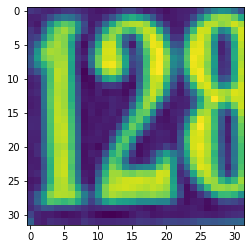

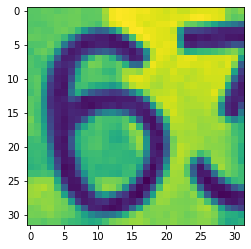

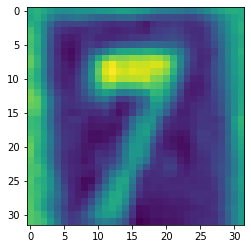

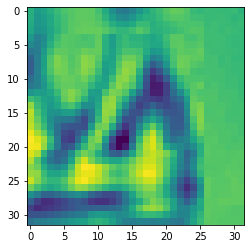

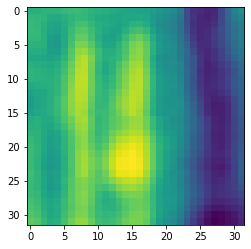

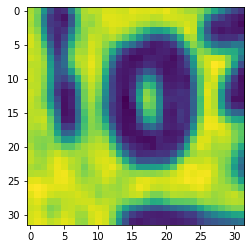

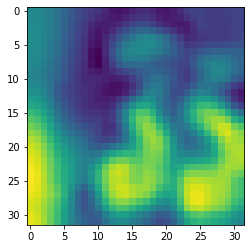

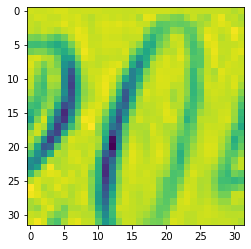

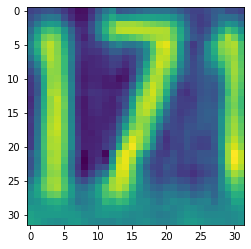

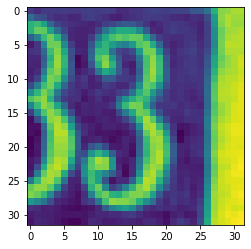

In [44]:
# displaying the images in the data set

for i in range(10):
    image = X_train[i]
    plt.figure(i)
    plt.imshow(image)

In [45]:
# displaying the one hot encoded labels

for i in range(10):
  print(y_train[i])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [46]:
X_train.shape

(42000, 32, 32)

In [47]:
def simple_model(): 
  
  model = Sequential()

  model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
  
  model.add(Dense(10,activation = 'softmax'))

  model.compile(optimizer='sgd', loss='categorical_crossentropy',  metrics = ['accuracy'])

  return model

In [48]:
simple_model = simple_model()
simple_history = simple_model.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val),batch_size=32,shuffle=False)

Epoch 1/10
1313/1313 [==============================] - ETA: 0s - loss: 52313.7539 - accuracy: 0.1026WARNING:tensorflow:Keras is training/fitting/evaluating on array-like data. Keras may not be optimized for this format, so if your input data format is supported by TensorFlow I/O (https://github.com/tensorflow/io) we recommend using that to load a Dataset instead.


1313/1313 [==============================] - 9s 7ms/step - loss: 52313.7539 - accuracy: 0.1026 - val_loss: 58258.1016 - val_accuracy: 0.0999
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 48783.4492 - accuracy: 0.1079 - val_loss: 59493.1016 - val_accuracy: 0.1000
Epoch 3/10
1313/1313 [==============================] - 9s 7ms/step - loss: 47646.1289 - accuracy: 0.1080 - val_loss: 46710.4023 - val_accuracy: 0.1019
Epoch 4/10
1313/1313 [==============================] - 8s 6ms/step - loss: 46303.1328 - accuracy: 0.1119 - val_loss: 49715.0781 - val_accuracy: 0.0999
Epoch 5/10
1313/1313 [==============================] - 8s 6ms/step - loss: 46013.4766 - accuracy: 0.1148 - val_loss: 51420.7266 - val_accuracy: 0.0980
Epoch 6/10
1313/1313 [==============================] - 8s 6ms/step - loss: 45874.5586 - accuracy: 0.1118 - val_loss: 39033.1836 - val_accuracy: 0.1080
Epoch 7/10
1313/1313 [==============================] - 9s 7ms/step - loss: 45253.6172 - accuracy: 

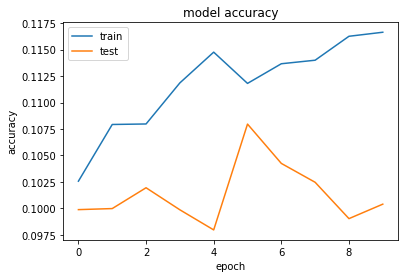

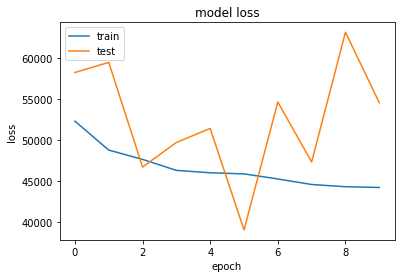

In [49]:
plt.plot(simple_history.history['accuracy'])
plt.plot(simple_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(simple_history.history['loss'])
plt.plot(simple_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

* **The training accuracy is very poor in this model as it is not complex enough to fit the data. The testing aaccuracy is very different from the training accuracy. Hence this model has high variance and high bias**

In [50]:
def mlp_model_complex():
    model = Sequential()
    model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))

    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = keras.optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [51]:
model = mlp_model_complex()
history = model.fit(X_train, y_train, epochs = 100,validation_data=(X_val,y_val),batch_size = 16,shuffle=False,verbose = 1)

Epoch 1/100
2625/2625 [==============================] - ETA: 0s - loss: 2.2272 - accuracy: 0.1802WARNING:tensorflow:Keras is training/fitting/evaluating on array-like data. Keras may not be optimized for this format, so if your input data format is supported by TensorFlow I/O (https://github.com/tensorflow/io) we recommend using that to load a Dataset instead.


2625/2625 [==============================] - 24s 9ms/step - loss: 2.2272 - accuracy: 0.1802 - val_loss: 2.0152 - val_accuracy: 0.2743
Epoch 2/100
2625/2625 [==============================] - 20s 8ms/step - loss: 1.8724 - accuracy: 0.3281 - val_loss: 1.5417 - val_accuracy: 0.4630
Epoch 3/100
2625/2625 [==============================] - 20s 8ms/step - loss: 1.7222 - accuracy: 0.3974 - val_loss: 1.5001 - val_accuracy: 0.4954
Epoch 4/100
2625/2625 [==============================] - 20s 8ms/step - loss: 1.6500 - accuracy: 0.4363 - val_loss: 1.3824 - val_accuracy: 0.5447
Epoch 5/100
2625/2625 [==============================] - 20s 8ms/step - loss: 1.5964 - accuracy: 0.4630 - val_loss: 1.4376 - val_accuracy: 0.5092
Epoch 6/100
2625/2625 [==============================] - 22s 8ms/step - loss: 1.5356 - accuracy: 0.4868 - val_loss: 1.2136 - val_accuracy: 0.6108
Epoch 7/100
2625/2625 [==============================] - 22s 8ms/step - loss: 1.4994 - accuracy: 0.5062 - val_loss: 1.3275 - val_accurac

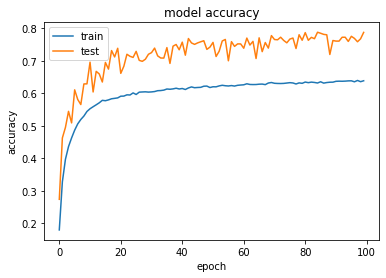

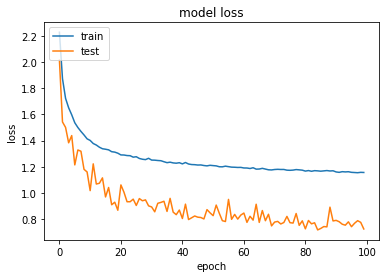

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

* **In this complex model we have added 4 hidden layers. There is a huge difference between the training and test accuracy/loss. The training accuracy and loss plateau after 20 epochs and there is no significant change.**

* **The training accuracy is only around 63 and the testing accuracy is 78 percent. Although this model is good, we will aim at improving the model such that atleast the training and the  test accuracy is greater than 85 percent**

In [53]:
def mlp_model2():
    model = Sequential()
    
    model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
    model.add(Dense(1024, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(500, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    

    model.add(Dense(255, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(132, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(72, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(42, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = keras.optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [54]:
model2 = mlp_model2()
history2 = model2.fit(X_train, y_train, epochs = 100,validation_data=(X_val,y_val),batch_size = 16,shuffle=False,verbose = 1)

Epoch 1/100
2623/2625 [============================>.] - ETA: 0s - loss: 1.6865 - accuracy: 0.4207WARNING:tensorflow:Keras is training/fitting/evaluating on array-like data. Keras may not be optimized for this format, so if your input data format is supported by TensorFlow I/O (https://github.com/tensorflow/io) we recommend using that to load a Dataset instead.


2625/2625 [==============================] - 70s 26ms/step - loss: 1.6860 - accuracy: 0.4209 - val_loss: 1.6719 - val_accuracy: 0.4436
Epoch 2/100
2625/2625 [==============================] - 66s 25ms/step - loss: 1.2707 - accuracy: 0.5942 - val_loss: 1.3021 - val_accuracy: 0.5854
Epoch 3/100
2625/2625 [==============================] - 68s 26ms/step - loss: 1.1004 - accuracy: 0.6496 - val_loss: 1.3167 - val_accuracy: 0.5779
Epoch 4/100
2625/2625 [==============================] - 70s 26ms/step - loss: 0.9801 - accuracy: 0.6888 - val_loss: 1.1041 - val_accuracy: 0.6443
Epoch 5/100
2625/2625 [==============================] - 68s 26ms/step - loss: 0.8751 - accuracy: 0.7211 - val_loss: 1.3807 - val_accuracy: 0.5790
Epoch 6/100
2625/2625 [==============================] - 67s 26ms/step - loss: 0.7871 - accuracy: 0.7500 - val_loss: 1.0245 - val_accuracy: 0.6692
Epoch 7/100
2625/2625 [==============================] - 68s 26ms/step - loss: 0.7068 - accuracy: 0.7758 - val_loss: 0.9917 - val_

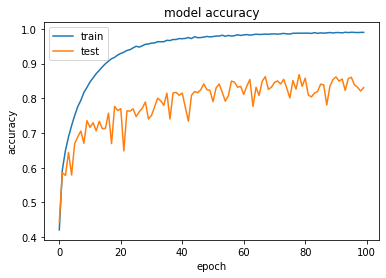

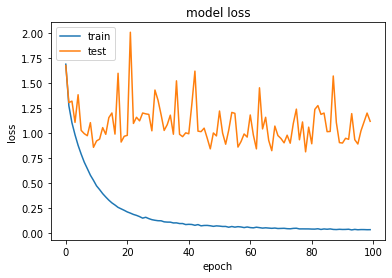

In [55]:

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

* **This model has high variance as there is a large difference between the training and the validation accuracy. The model is clearly overfitting**
* **There is a huge difference in the training and the validation loss. We should add drop out layers so that the model is not overfitting.**

In [56]:
def mlp_model3():
    model = Sequential()
    model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
    model.add(Dense(1024, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(500, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))    
    model.add(Dense(255, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(132, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(72, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(42, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = keras.optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [57]:
model3 = mlp_model3()
history3 = model3.fit(X_train, y_train, epochs = 100,validation_data=(X_val,y_val),batch_size = 16,shuffle=False,verbose = 1)

Epoch 1/100
2623/2625 [============================>.] - ETA: 0s - loss: 2.0701 - accuracy: 0.2449WARNING:tensorflow:Keras is training/fitting/evaluating on array-like data. Keras may not be optimized for this format, so if your input data format is supported by TensorFlow I/O (https://github.com/tensorflow/io) we recommend using that to load a Dataset instead.


2625/2625 [==============================] - 73s 27ms/step - loss: 2.0696 - accuracy: 0.2451 - val_loss: 1.6990 - val_accuracy: 0.4051
Epoch 2/100
2625/2625 [==============================] - 70s 27ms/step - loss: 1.6143 - accuracy: 0.4543 - val_loss: 1.6061 - val_accuracy: 0.4744
Epoch 3/100
2625/2625 [==============================] - 69s 26ms/step - loss: 1.4074 - accuracy: 0.5512 - val_loss: 1.3993 - val_accuracy: 0.5434
Epoch 4/100
2625/2625 [==============================] - 68s 26ms/step - loss: 1.2724 - accuracy: 0.5985 - val_loss: 1.1456 - val_accuracy: 0.6317
Epoch 5/100
2625/2625 [==============================] - 70s 27ms/step - loss: 1.1778 - accuracy: 0.6293 - val_loss: 1.1997 - val_accuracy: 0.6149
Epoch 6/100
2625/2625 [==============================] - 69s 26ms/step - loss: 1.1109 - accuracy: 0.6516 - val_loss: 0.9854 - val_accuracy: 0.6931
Epoch 7/100
2625/2625 [==============================] - 69s 26ms/step - loss: 1.0501 - accuracy: 0.6722 - val_loss: 0.8999 - val_

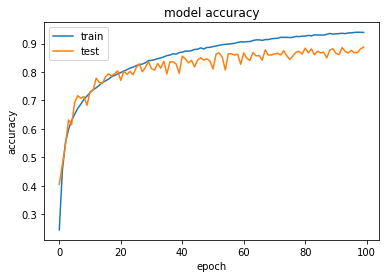

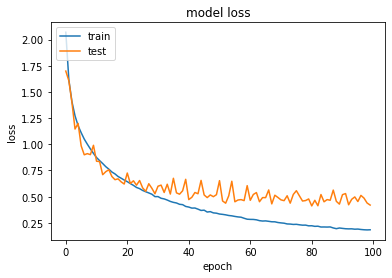

In [59]:

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

* **From this graph we can tell that the model accuracy is almost the same for the training and the validation dataset. The loss for both the train and validation dataset is similar**

* **The train acccuracy of the model is around 93 percent and the validation accuracy of the model is around 88 percent. This means that the model is does not have high bias or high variance. The model performance is good on both training and the validation set**

* **This is the best model as there is no variance and bias. We can also observe that the training accuracy improves with the number of epochs. If we train the model on more epochs we might get an accuracy of over 95 percent and the loss well below 0.30**